In [1]:
inputFile='data.xlsx'

import pandas as pd
data=pd.read_excel(inputFile,sheet_name=None,index_col=0)
centers=data['Fulfilment Centers']
regions=data['Regions']
distances=data['Distances']
items=data['Items']
demand=data['Demand']


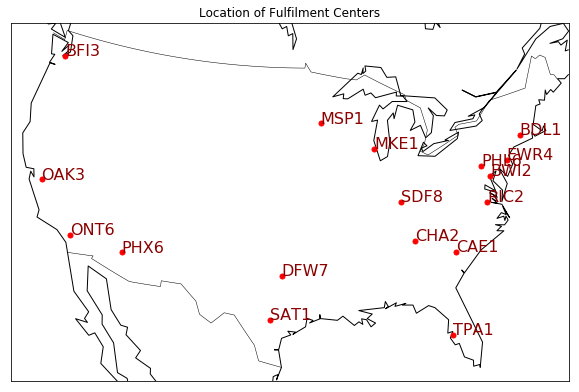

In [2]:
# Plot the fulfillment centers
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10,8))
# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.drawcountries()
map.drawcoastlines()

for fc_name in centers.index:
    x,y=map(centers.loc[fc_name,'long'],centers.loc[fc_name,'lat'])
    plt.plot(x,y,'ro',markersize=5)
    plt.text(x,y,fc_name,fontdict={'size':16,'color':'darkred'})
plt.title('Location of Fulfilment Centers')
plt.show()

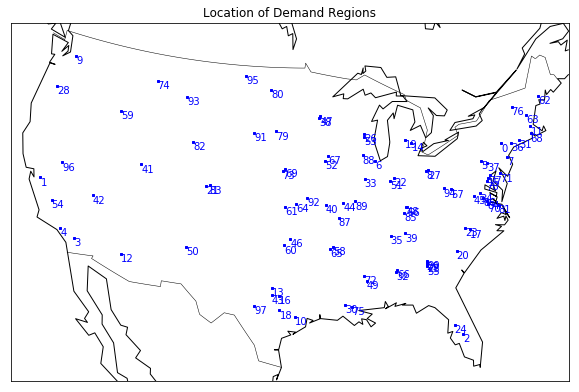

In [3]:
#Plot the demand regions

plt.figure(figsize=(10,8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.drawcountries()
map.drawcoastlines()

for reg_ID in regions.index:
    x,y=map(regions.loc[reg_ID,'long'],regions.loc[reg_ID,'lat'])
    plt.plot(x,y,'bs',markersize=2)
    plt.text(x,y,reg_ID,verticalalignment='top',fontdict={'color':'blue'})
plt.title('Location of Demand Regions')
plt.show()

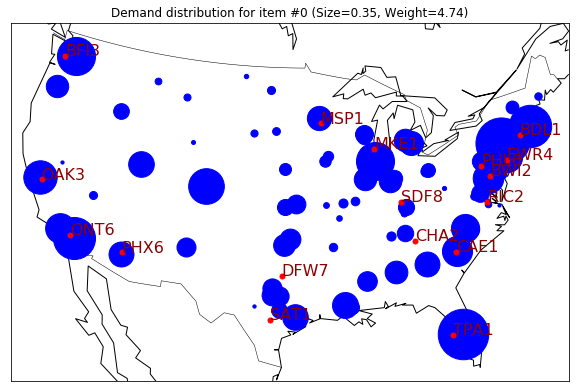

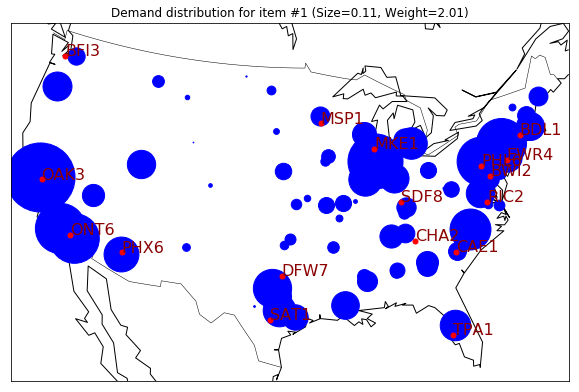

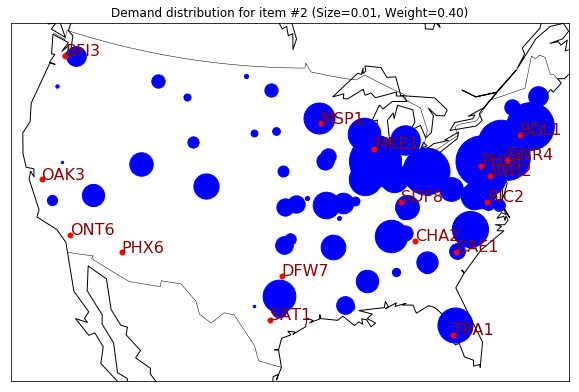

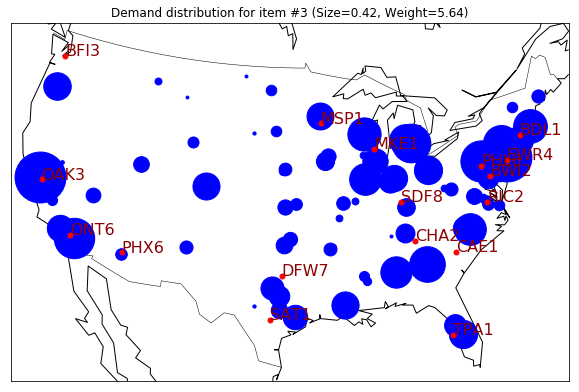

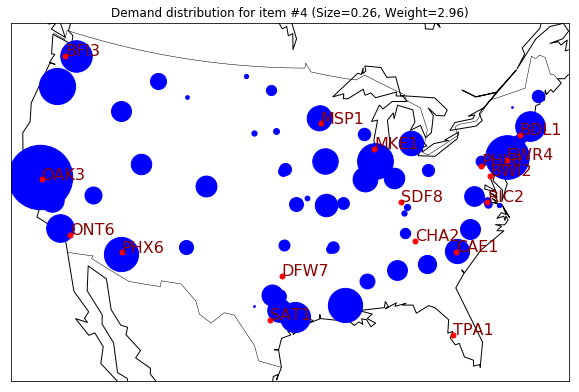

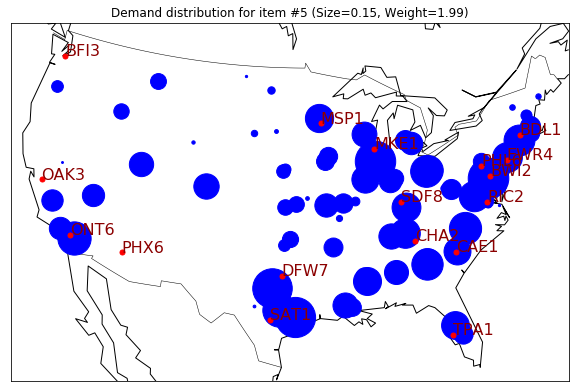

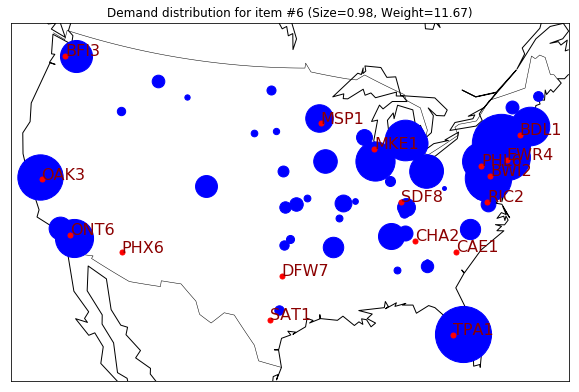

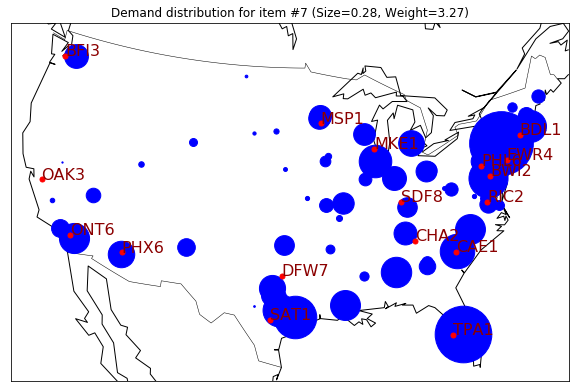

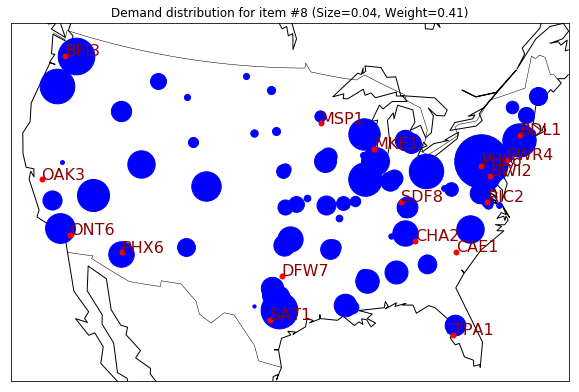

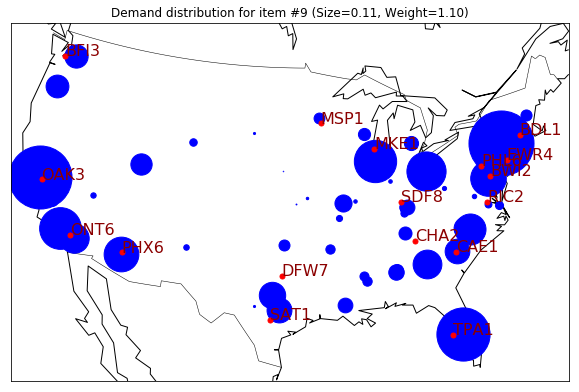

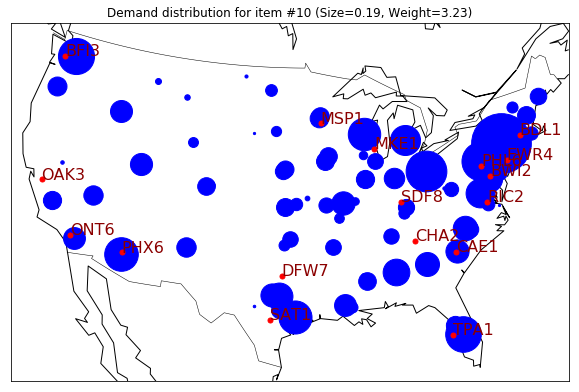

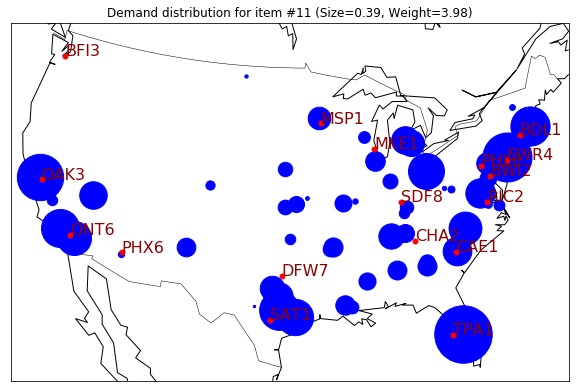

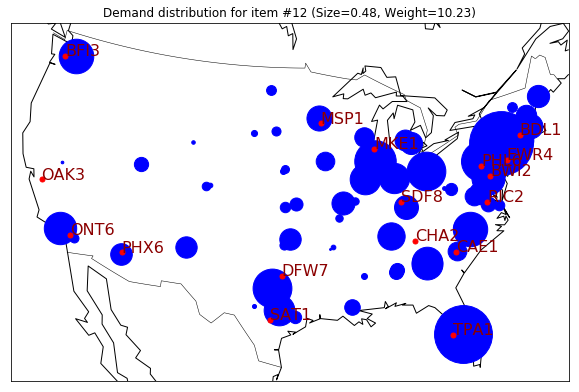

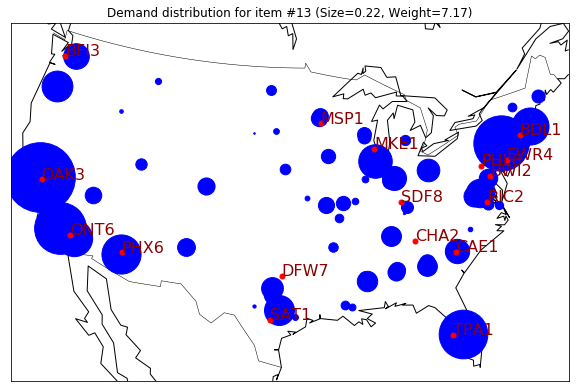

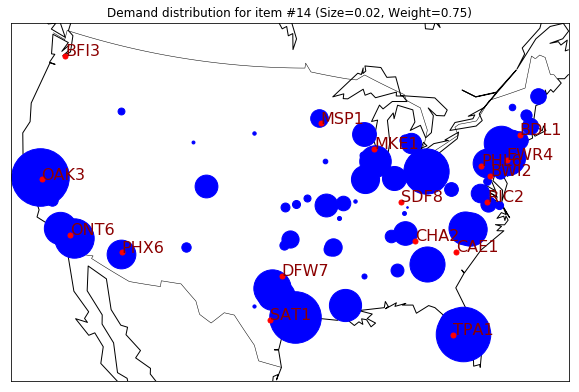

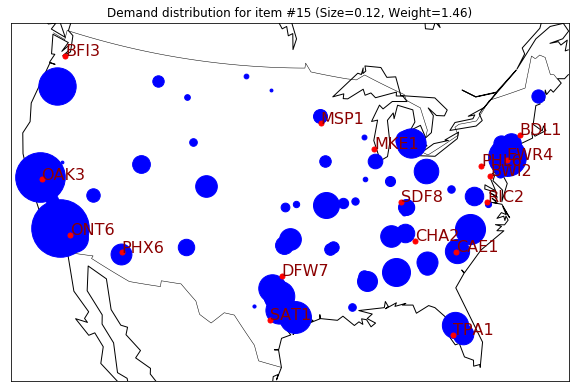

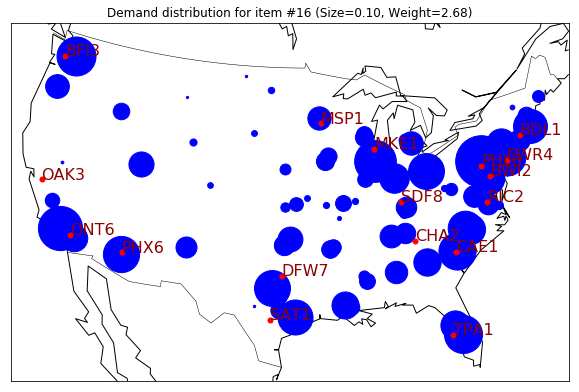

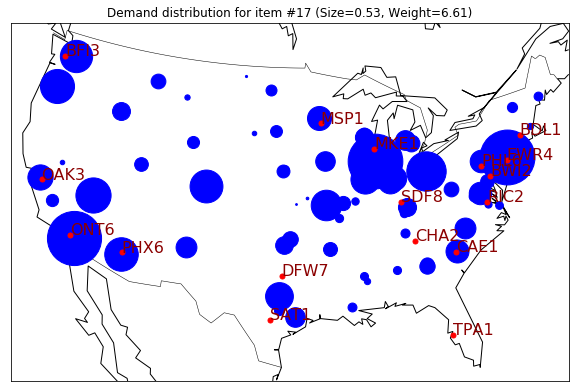

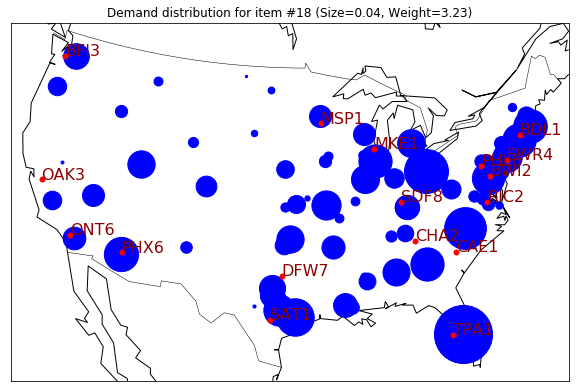

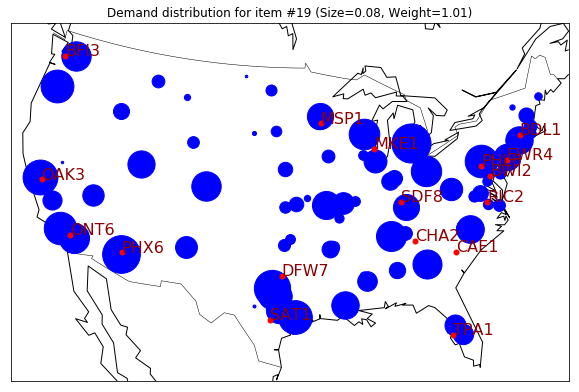

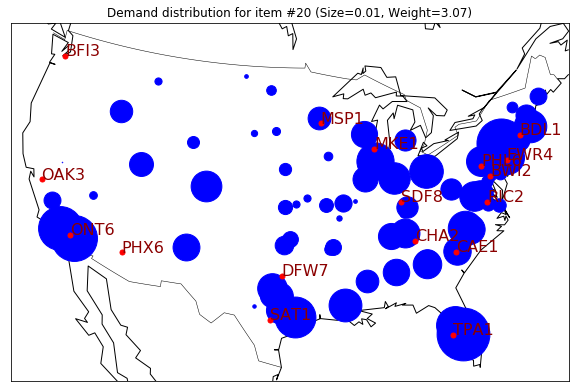

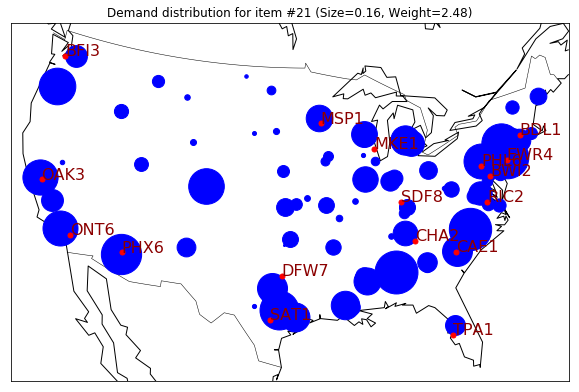

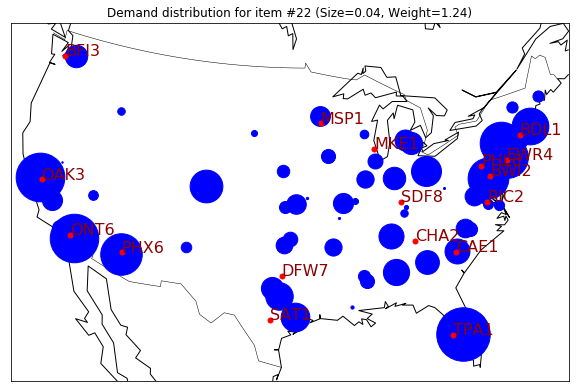

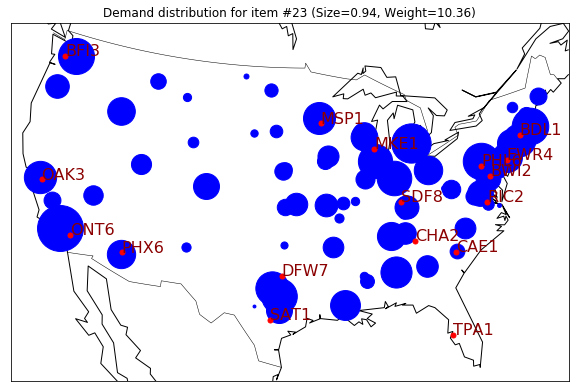

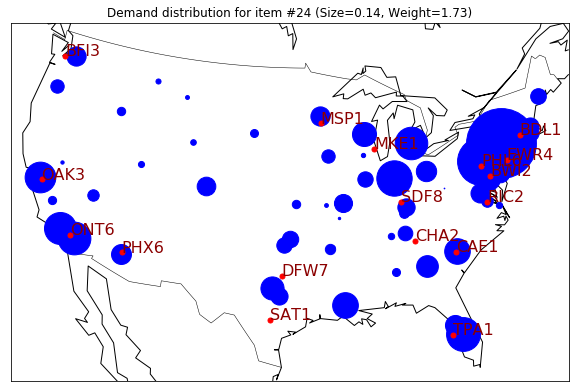

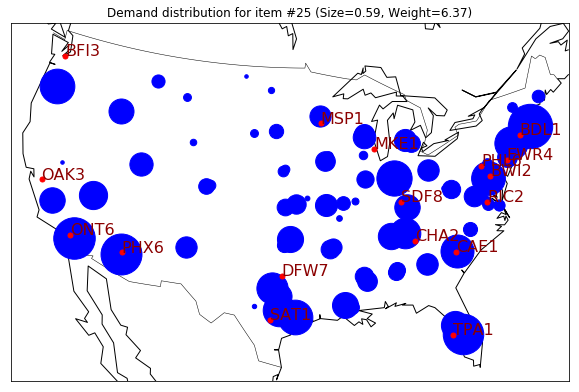

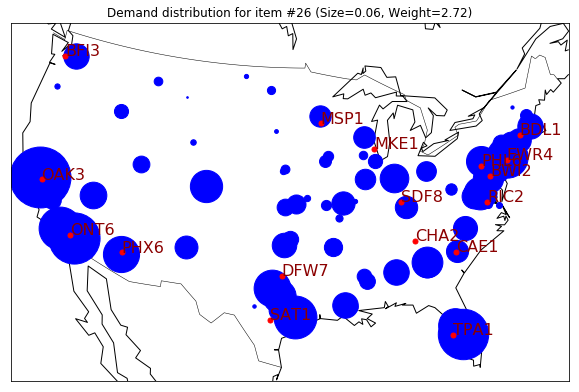

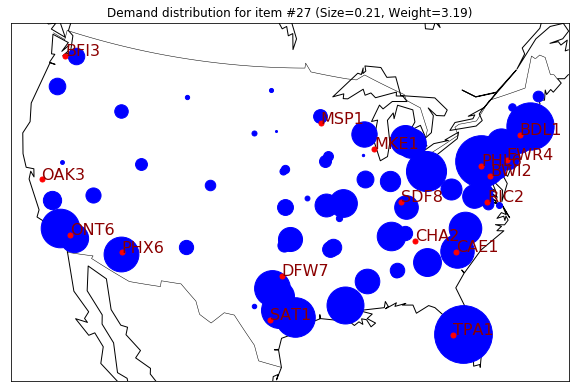

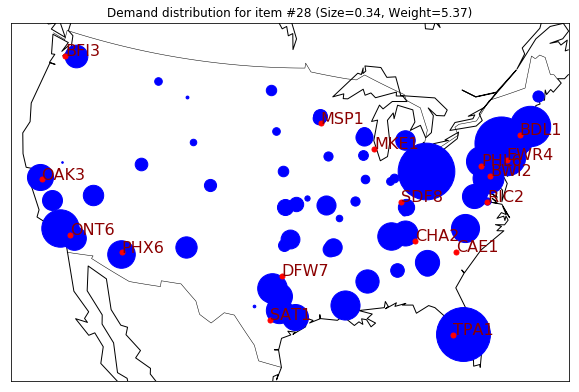

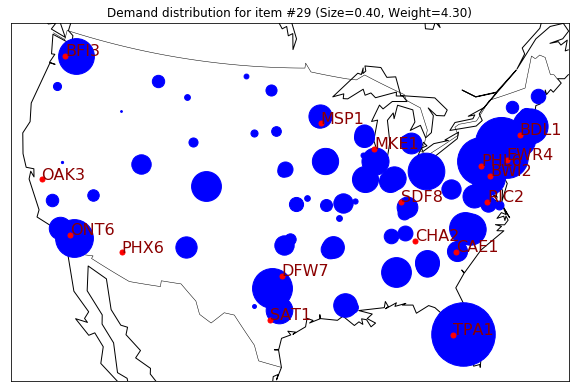

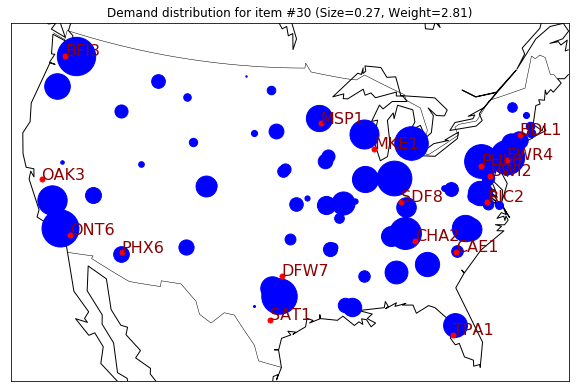

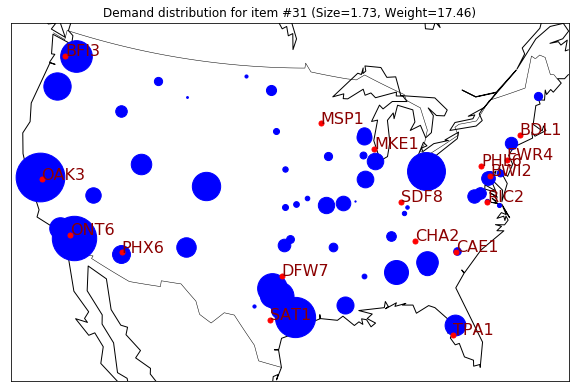

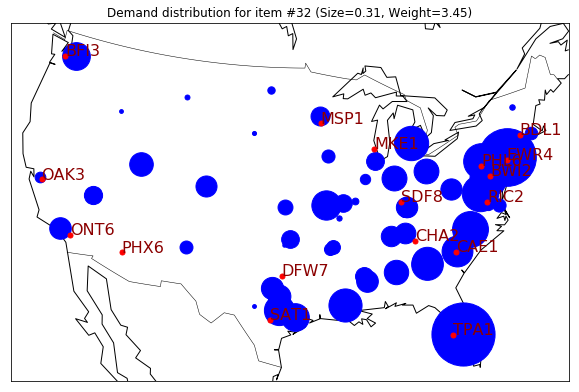

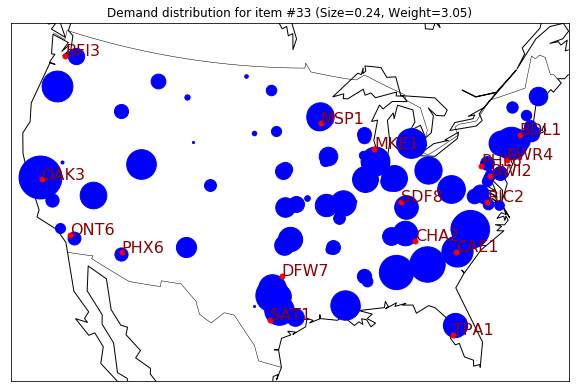

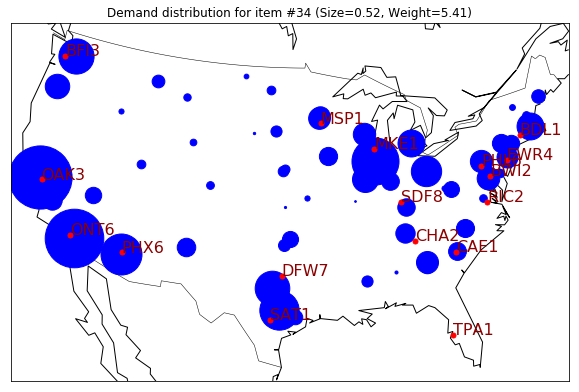

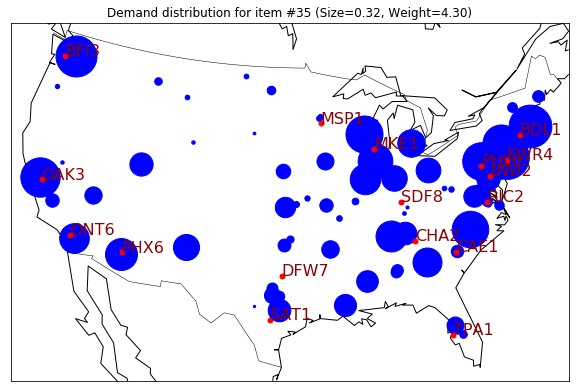

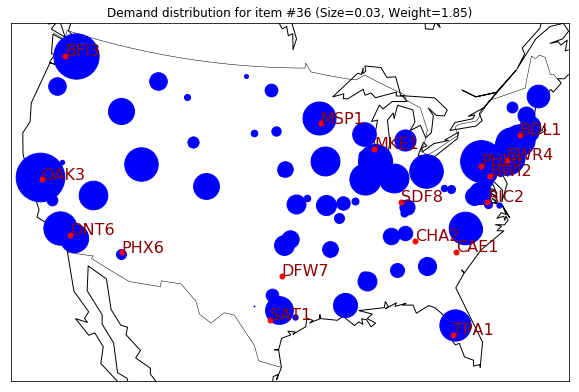

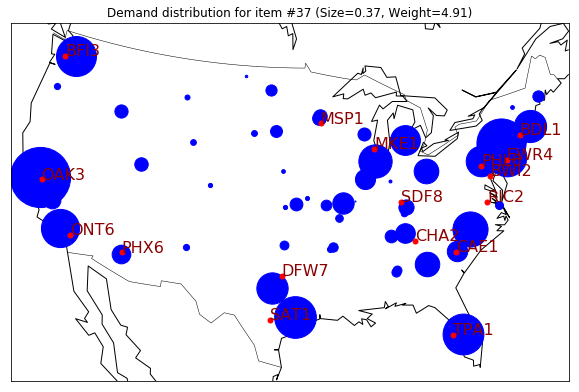

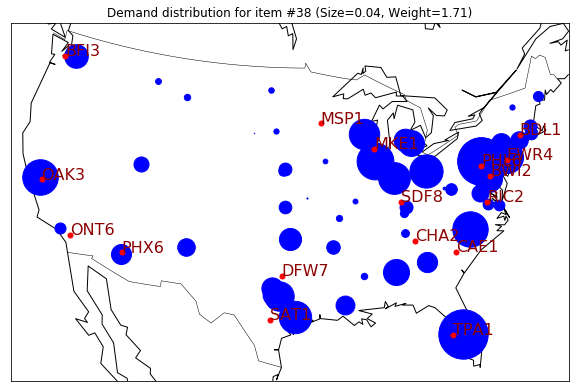

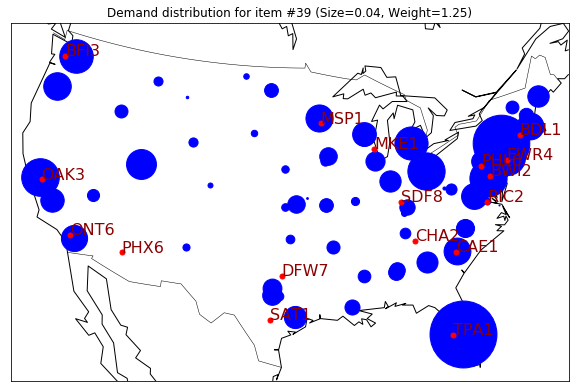

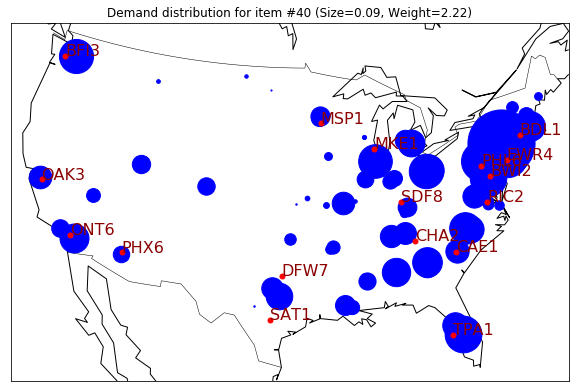

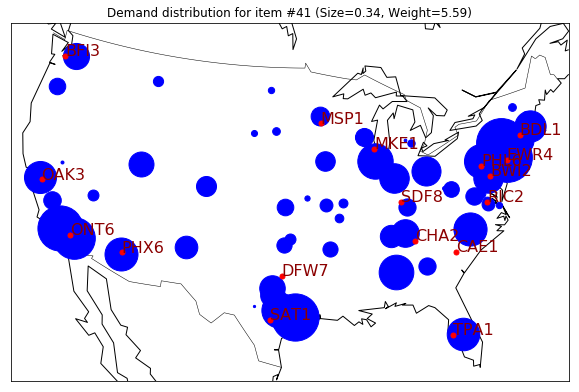

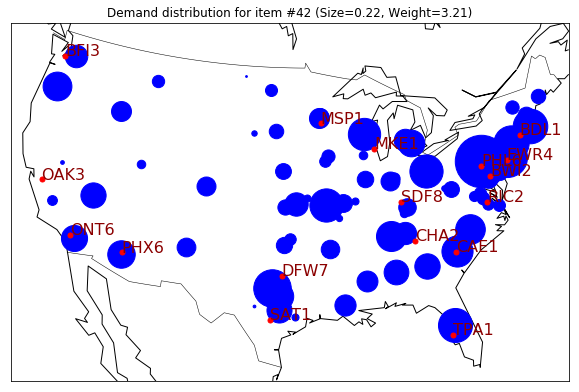

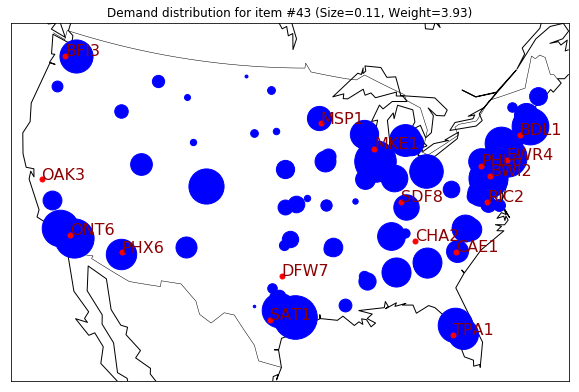

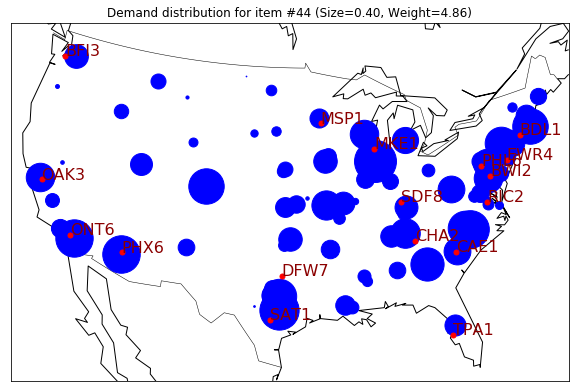

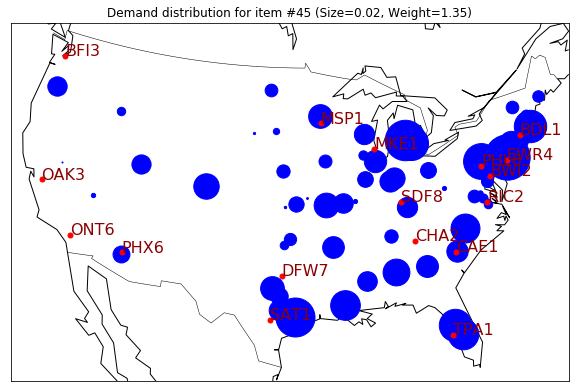

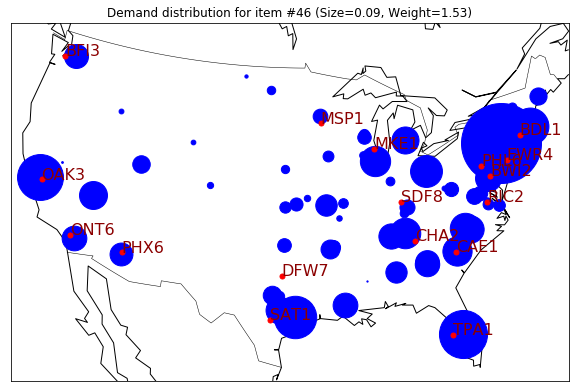

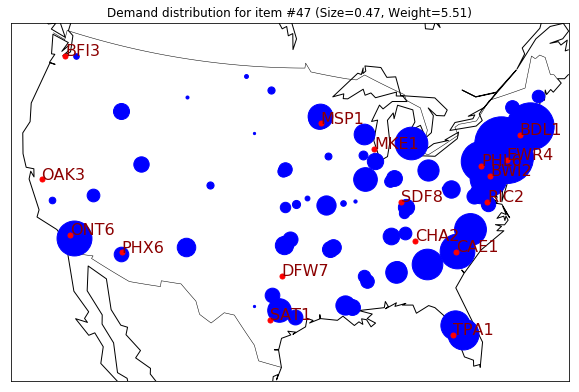

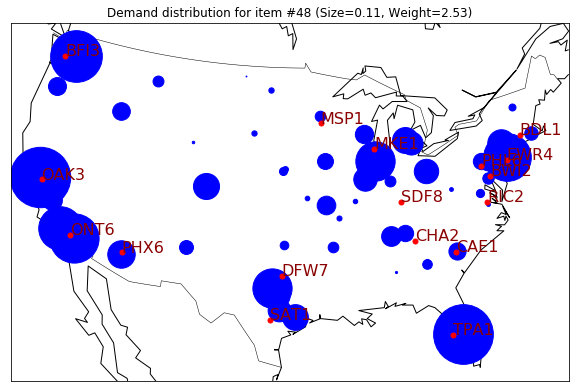

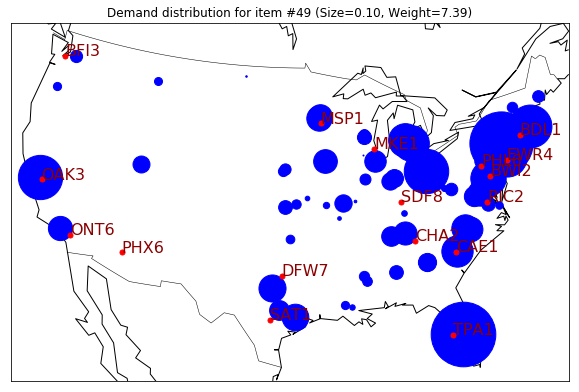

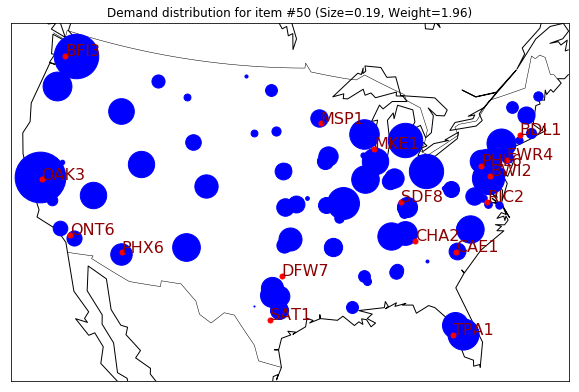

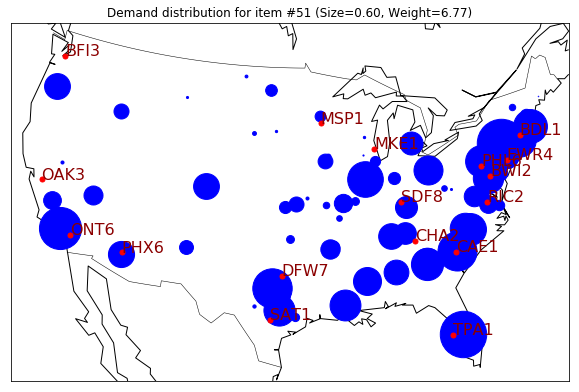

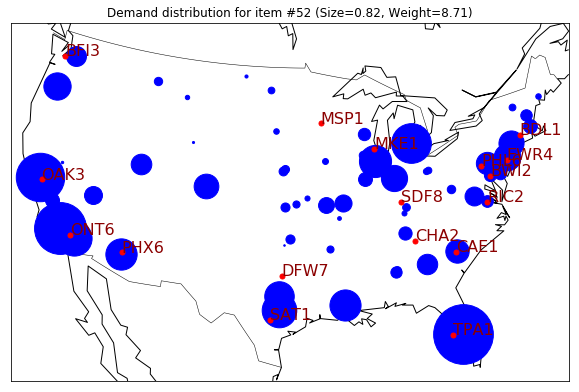

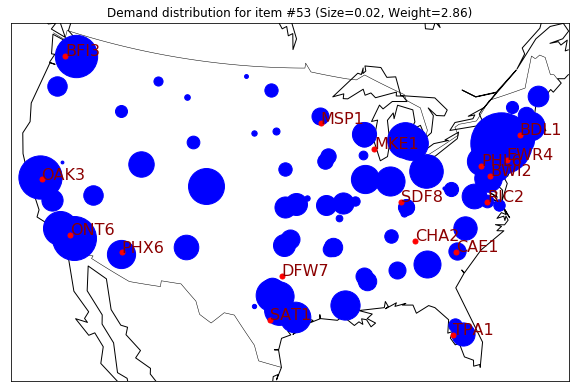

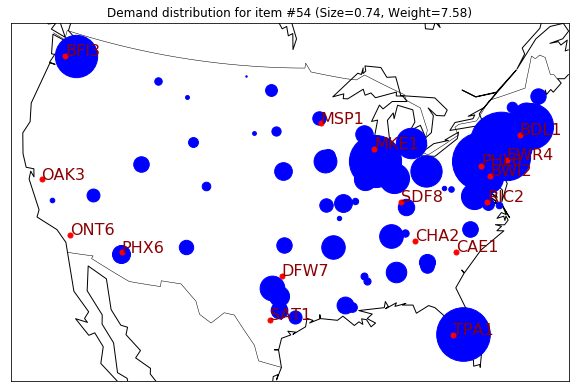

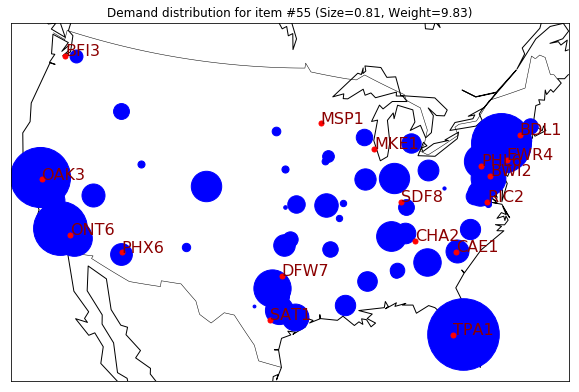

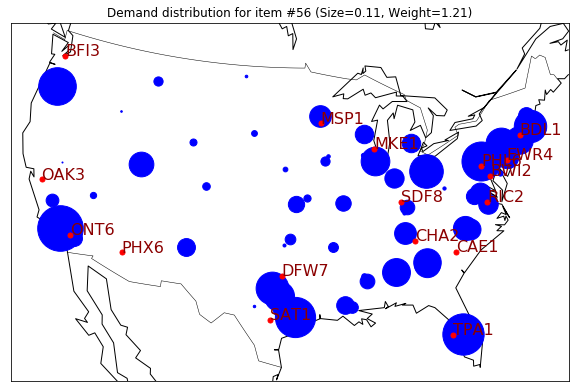

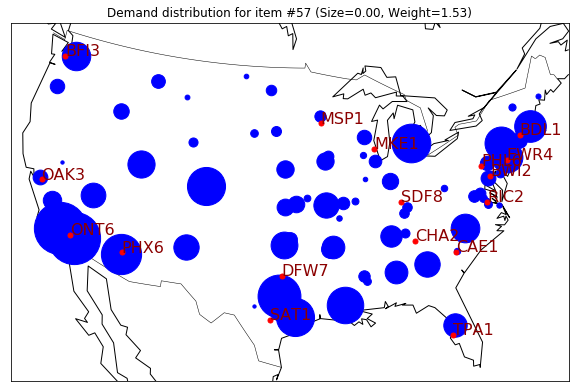

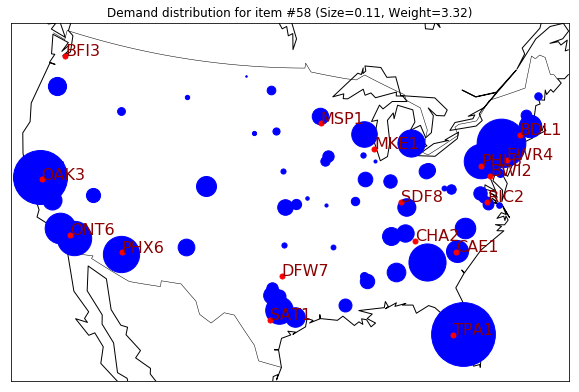

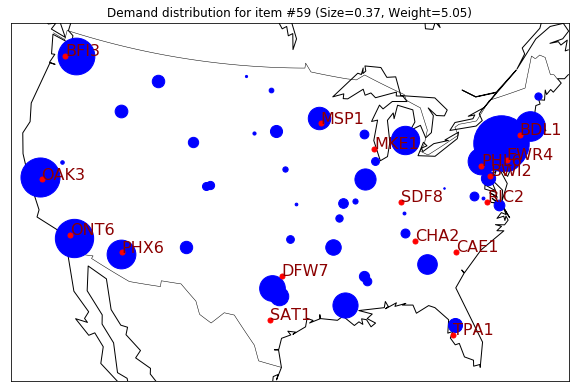

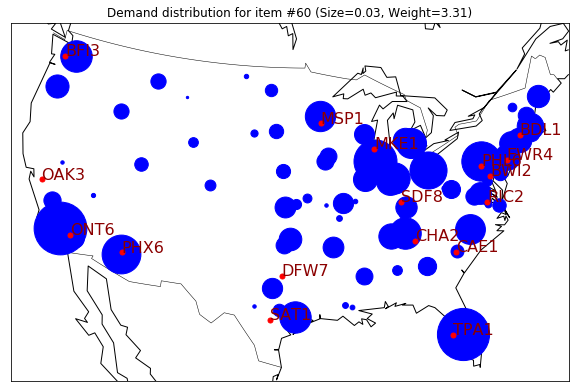

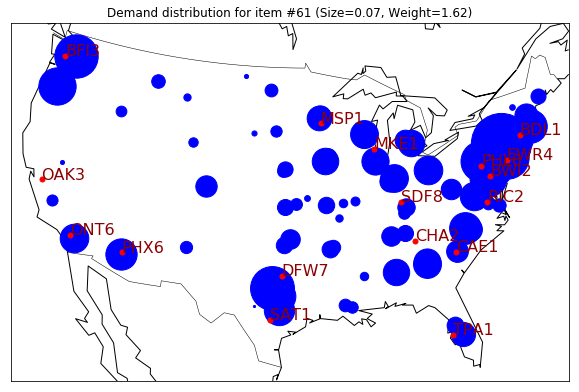

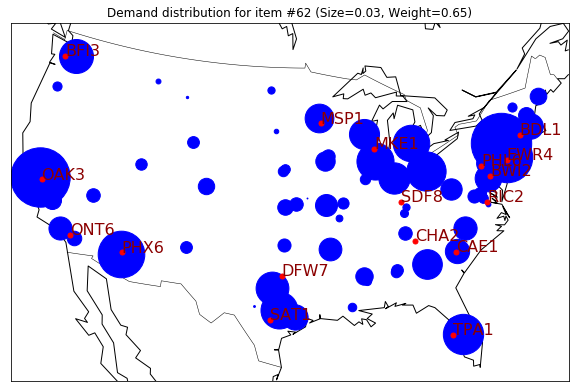

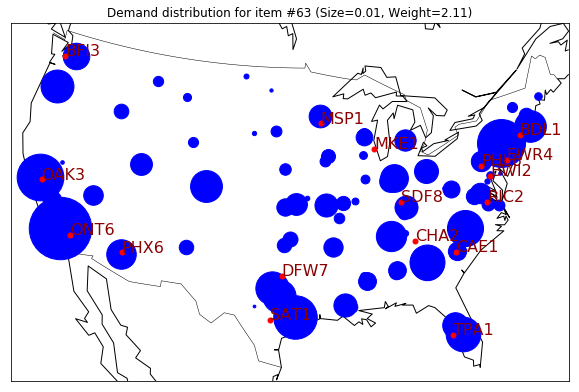

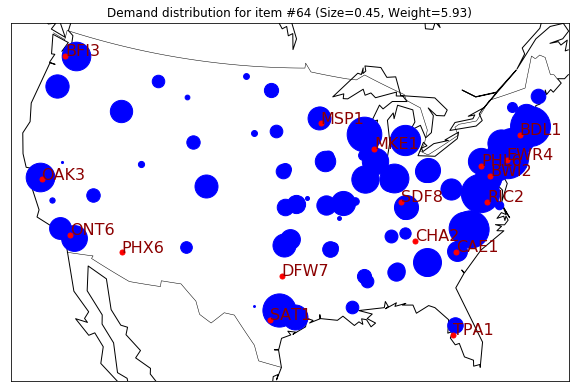

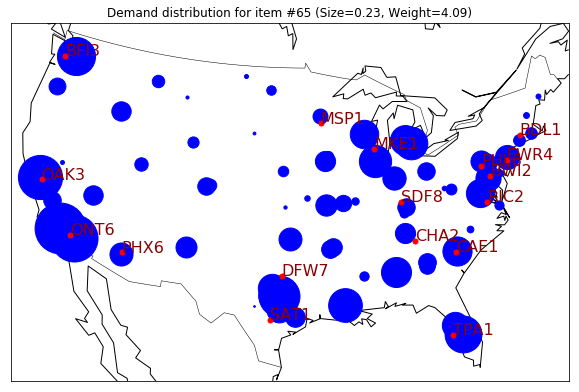

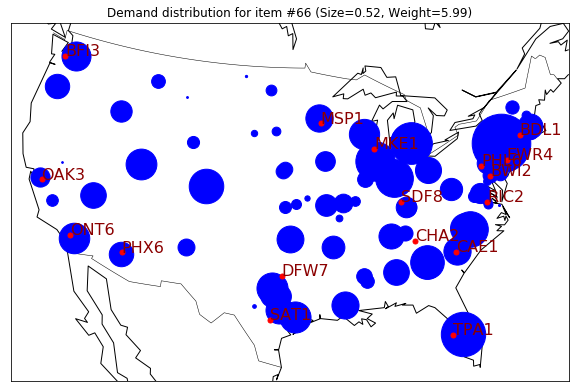

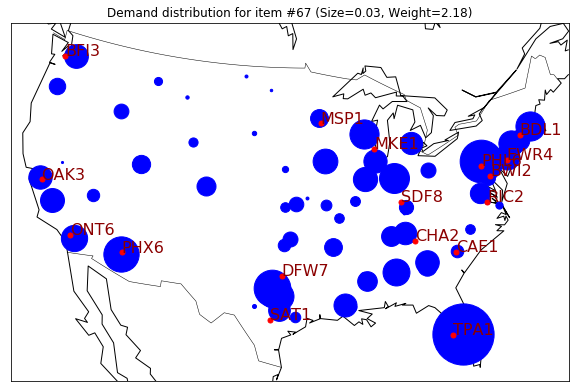

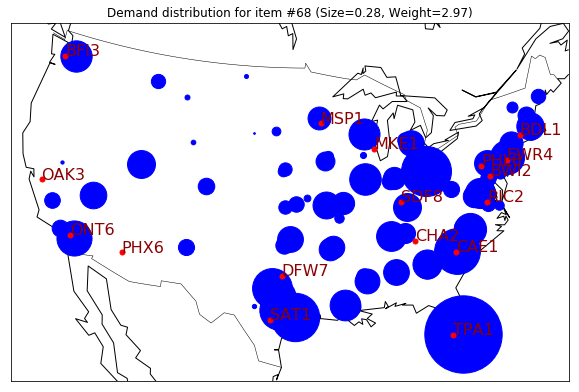

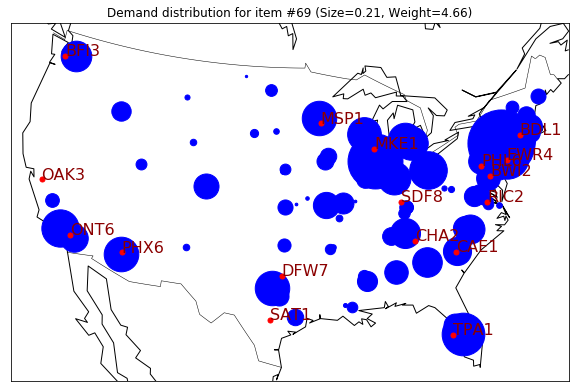

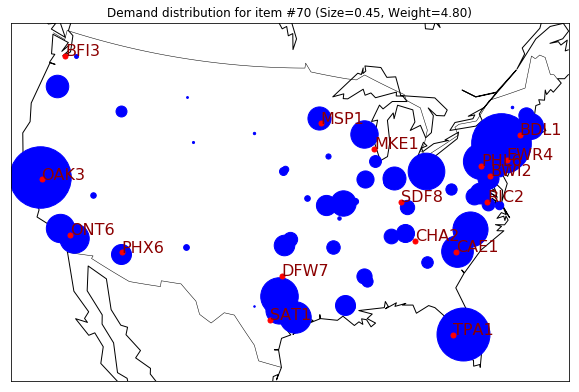

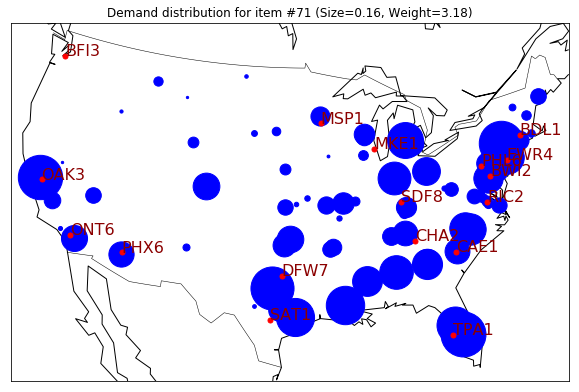

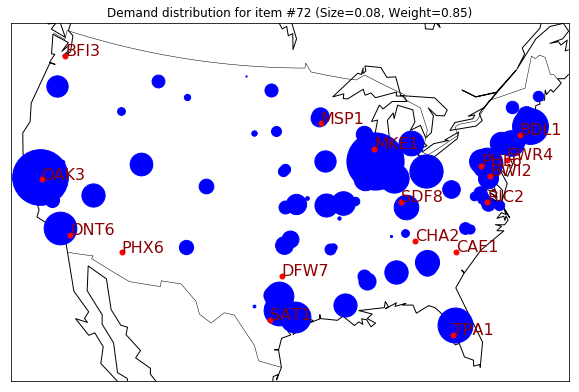

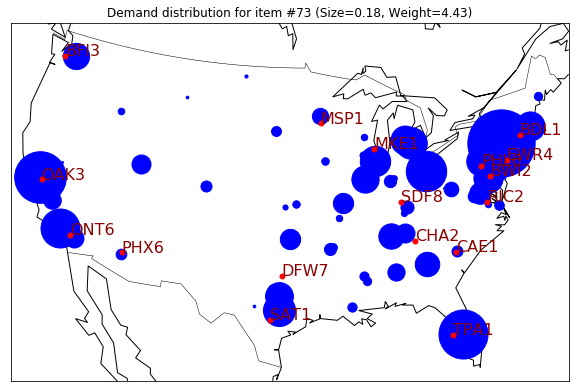

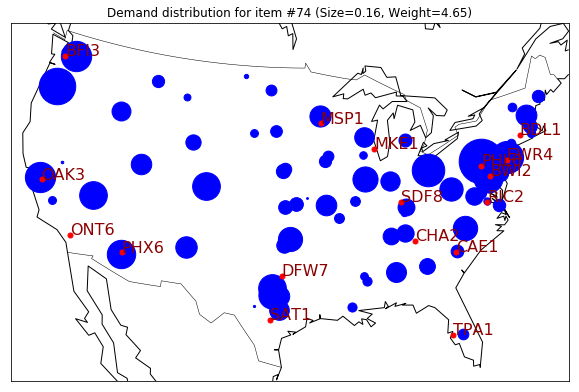

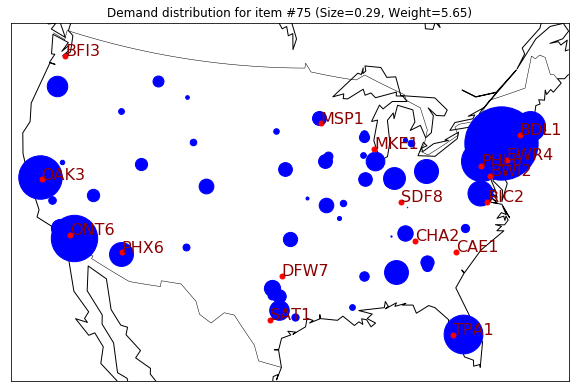

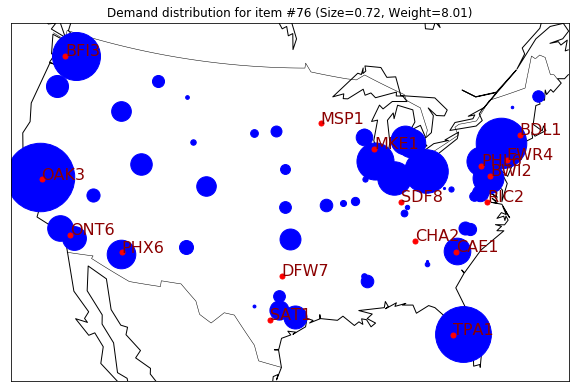

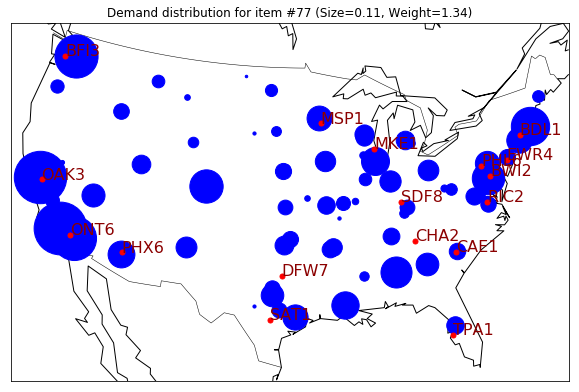

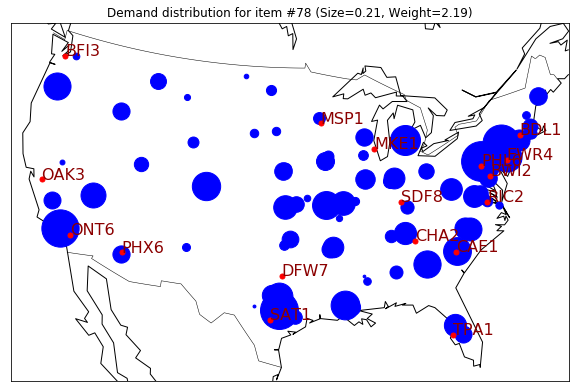

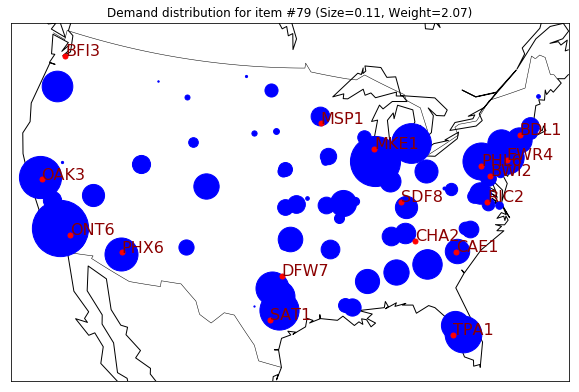

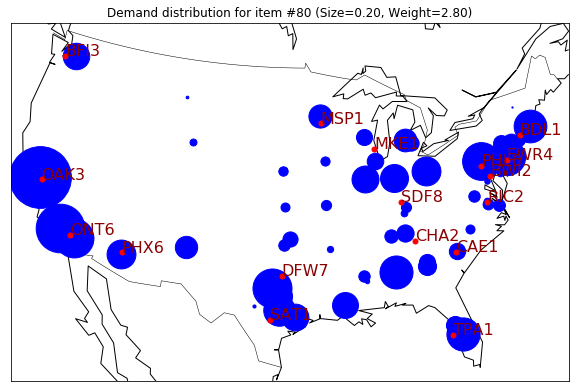

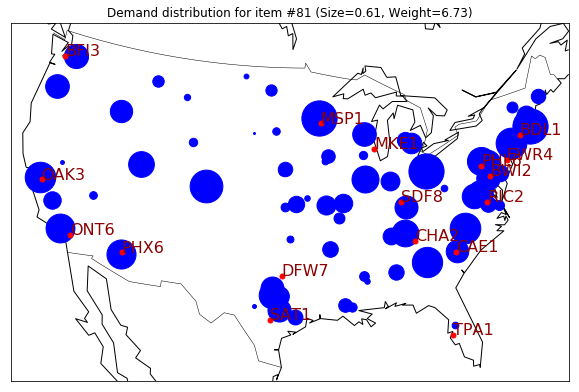

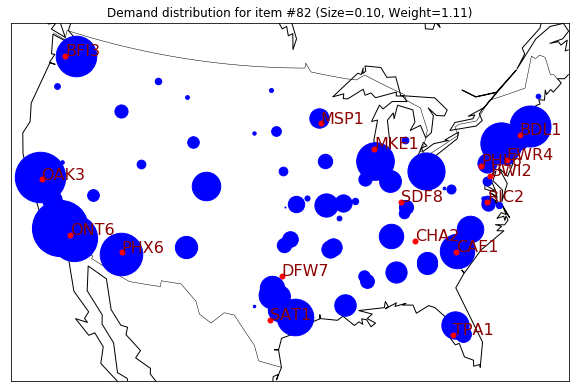

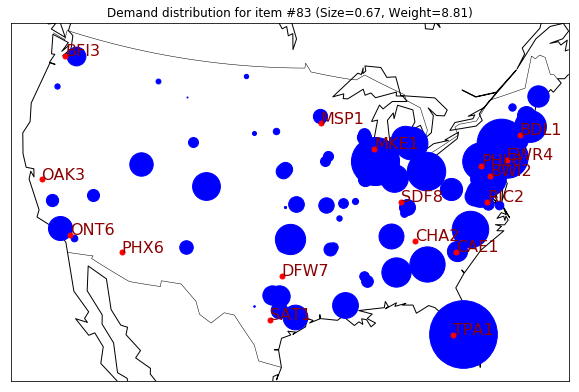

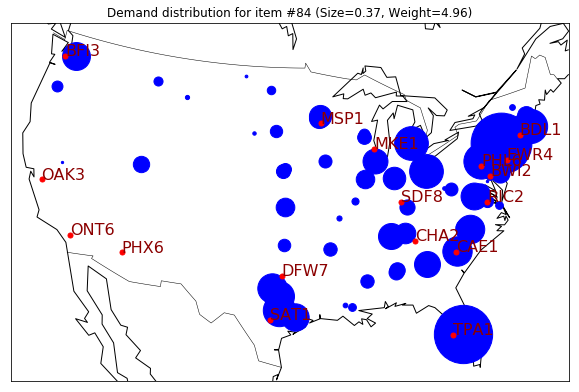

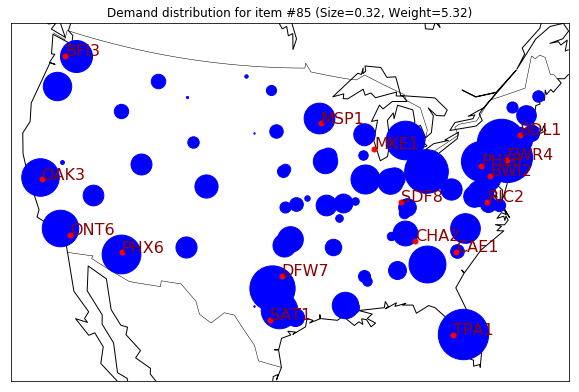

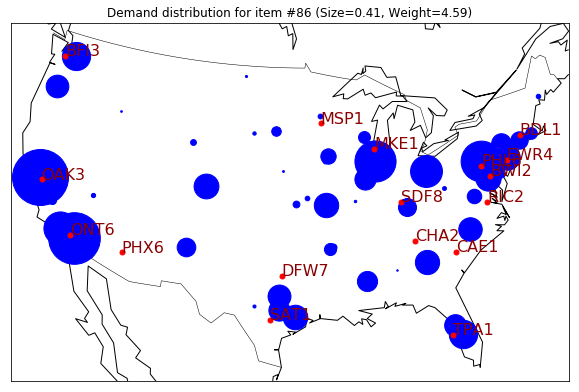

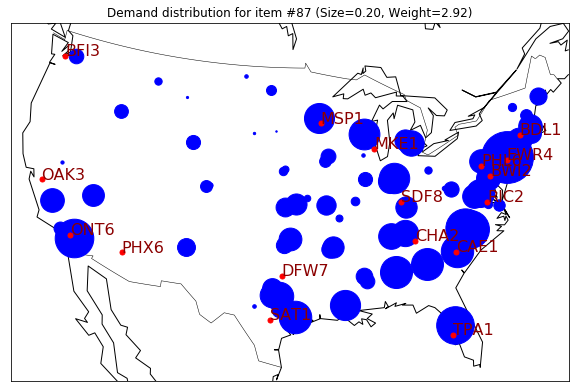

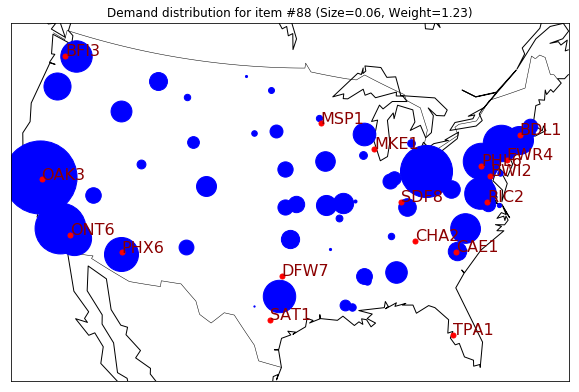

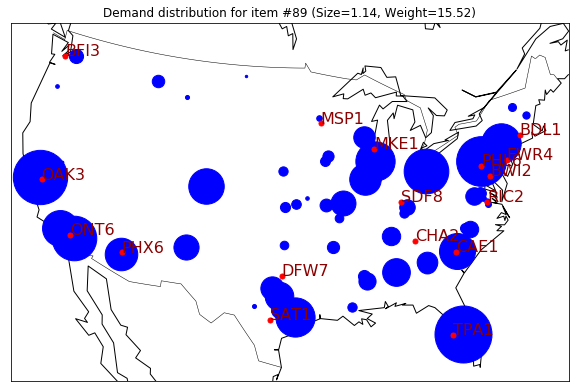

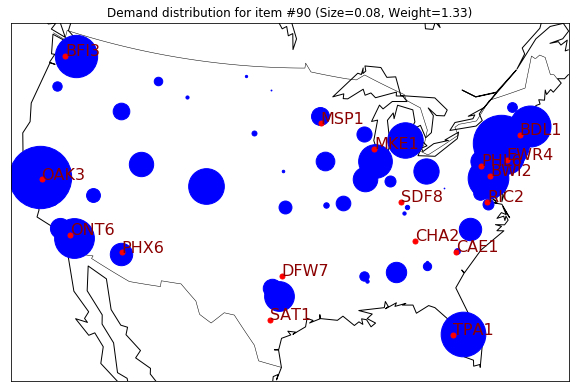

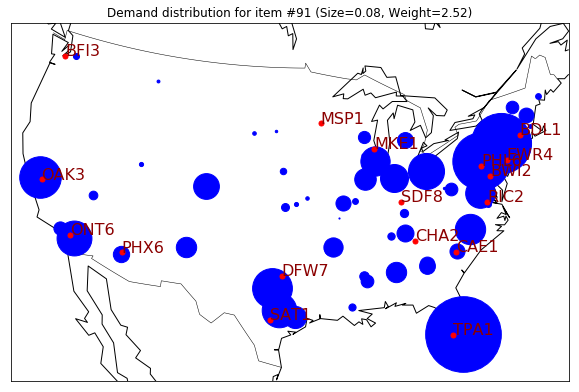

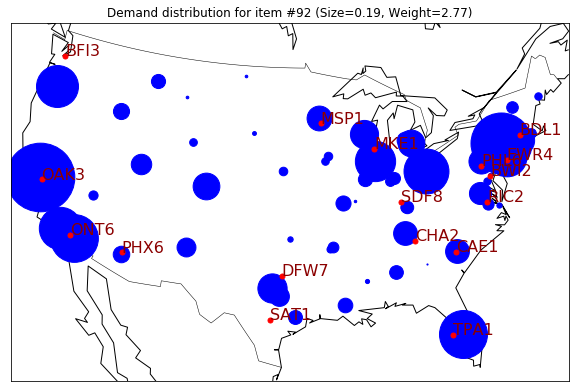

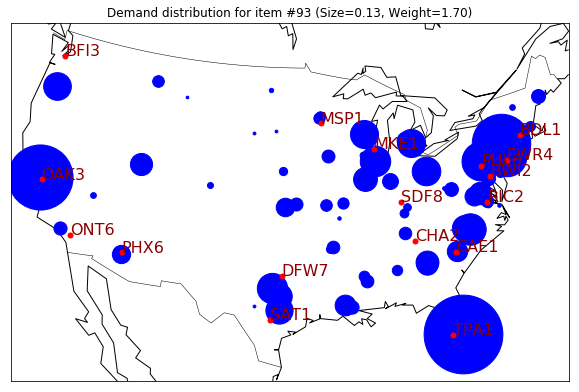

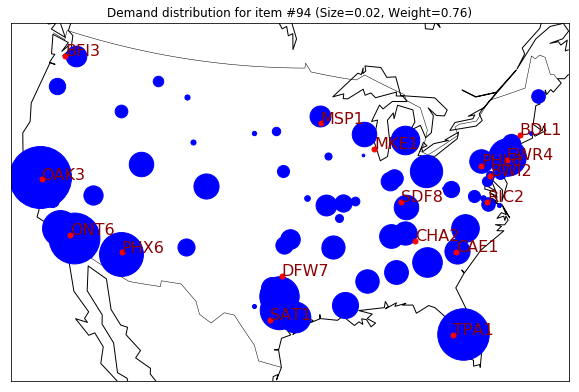

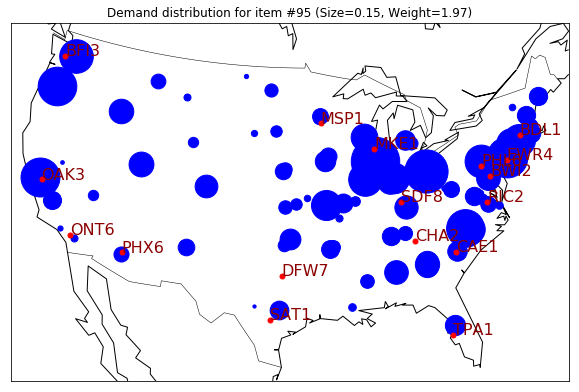

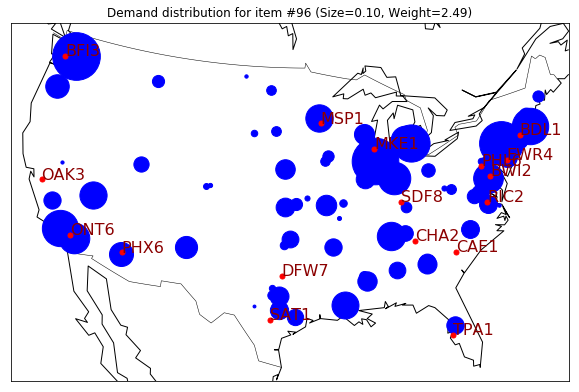

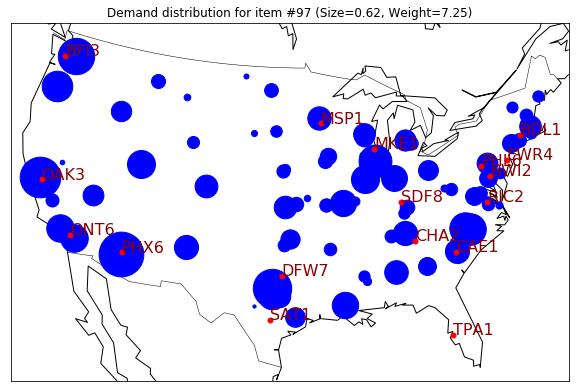

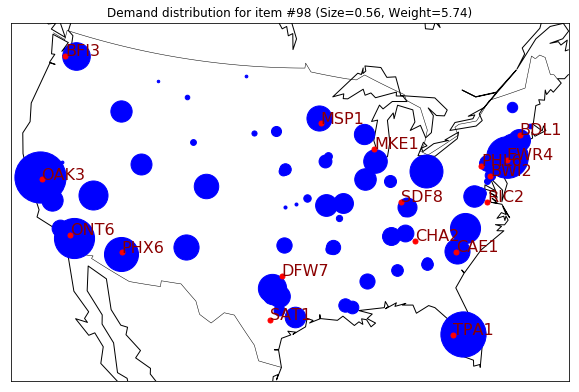

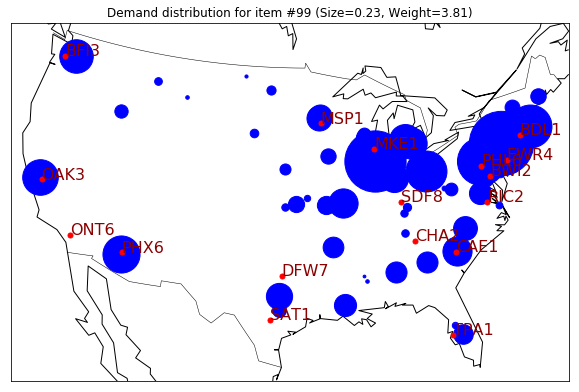

In [4]:
# Plot the demand
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

mult=80/(np.sqrt(demand.max().max()))

for k in items.index:
    plt.figure(figsize=(10,8))
    # create the map
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    map.drawcountries()
    map.drawcoastlines()

    for reg_ID in regions.index:
        x,y=map(regions.loc[reg_ID,'long'],regions.loc[reg_ID,'lat'])
        plt.plot(x,y,'ob',markersize=np.sqrt(demand.loc[k,reg_ID])*mult)
    
    for fc_name in centers.index:
        x,y=map(centers.loc[fc_name,'long'],centers.loc[fc_name,'lat'])
        plt.plot(x,y,'or',markersize=5)
        plt.text(x,y,fc_name,fontdict={'color':'darkred','size':16})
    plt.title('Demand distribution for item #{0:d} (Size={1:.2f}, Weight={2:.2f})'.format(k,items.loc[k,'storage_size'],items.loc[k,'shipping_weight']))
    plt.show()
    plt.close()